# Homework Wk.7-8

In [6]:
## %load_ext rpy2.ipython
%reload_ext rpy2.ipython


-------------------

## Week 7, Oct 14-20 R code “Example 4.1-4.5 R script”

R code “Example 4.1-4.5 R script” posted on Brightspace shows how to use R to perform model checking by using various types of residuals we have discussed in class. It covers computations for Example 4.1 to 4.5 in Chapter 4 of the textbook. As a part of the homework for this week, run the code, understand the each and every line of the code, and understand the output.

$$
\sim \sim \sim
$$

### 1. Load & verify data

In [10]:
%%R

# Example 4.1-4.5: Delivery time data (Model checking)
#
# This example illustrates how to compute and plot various types of residuals
#

### [1] Reading data into R and checking data
#
#   see the previous R script for file handling information.

rm(y,x1,x2)

data2=read.table(file="3-1.prn", header=TRUE)  
attach(data2)  # data2 is a table in R. This allows variables in the table to be used individually.
print(data2)   # see if there data points are correct

library(scatterplot3d)
library(robustbase)

R[write to console]: The following objects are masked from data2 (pos = 5):

    Obs, x1, x2, y




   Obs     y x1   x2
1    1 16.68  7  560
2    2 11.50  3  220
3    3 12.03  3  340
4    4 14.88  4   80
5    5 13.75  6  150
6    6 18.11  7  330
7    7  8.00  2  110
8    8 17.83  7  210
9    9 79.24 30 1460
10  10 21.50  5  605
11  11 40.33 16  688
12  12 21.00 10  215
13  13 13.50  4  255
14  14 19.75  6  462
15  15 24.00  9  448
16  16 29.00 10  776
17  17 15.35  6  200
18  18 19.00  7  132
19  19  9.50  3   36
20  20 35.10 17  770
21  21 17.90 10  140
22  22 52.32 26  810
23  23 18.75  9  450
24  24 19.83  8  635
25  25 10.75  4  150


### (2) Plot/visualize data

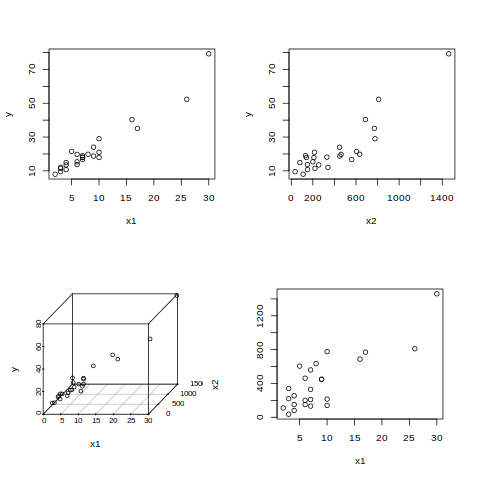

In [11]:
%%R

### [2] Plotting/visualizing data
#
#
par(mfrow=c(2,2))  # create a 2x2 frame to hold 4 plots
plot(x1,y)         # view linear relationship between x1 and y
plot(x2,y)         # view linear relationship between x2 and y
scatterplot3d(x1,x2,y) # view linear relationship between y and x1, x2:
                       # the points should be roughly on a plane.
plot(x1,x2)        # make sure x1 and x2 are not linearly related

### (3) Fit lm, compute residuals

In [12]:
%%R
fit1=lm(y~x1+x2) # fit the full model with both predictors

#### (3a) Row (ordinary) residuals (e1)

In [14]:
%%R

#[3a] compute/retrive the raw (oridinary) residuals e1

e1=fit1$residuals

#### (3b) Standardized residuals (d1)

In [1]:
%%R
#[3b] compute the standardized residuals d1

MSE=sum(e1^2)/(length(y)-3) # or MSE=(summary(fit1)$sigma)^2 
d1=e1/sqrt(MSE)

UsageError: Cell magic `%%R` not found.


#### (3c) Studentized residuals (r1)

In [16]:
%%R
#[3c] compute the studentized residuals r1

X=matrix(1,25,3)
X[,2]=x1
X[,3]=x2

XX=t(X)%*%X
invXX=solve(XX)
H=X%*%invXX%*%t(X)  # the H matrix
diagH=diag(H)       # diagonal elements of H

r1=e1/sqrt(MSE*(1-diagH)) 

#### (3d) PRESS residuals (PRESSe)

In [17]:
%%R
#[3d] compute the PRESS residuals PRESSe

PRESSe=e1/(1-diagH)

#### (3e) Robust regression residuals (r2)

In [20]:
%%R
#[3e] compute robust regression residuals r2

library(robustbase)    #load package "robustbase"
robfit=lmrob(y~x1+x2)  #robust regression

r2=robfit$residuals
s=robfit$scale
r2=r2/s

#display all data points, residuals and diagH

Resid=cbind(y, x1, x2, diagH, e1, d1, r1, PRESSe, r2)
Resid=round(Resid, digits=3)  #keeps only 3 digits after the decimal point
                              #for easy display
Resid

       y x1   x2 diagH     e1     d1     r1 PRESSe     r2
1  16.68  7  560 0.102 -5.028 -1.543 -1.628 -5.598 -2.039
2  11.50  3  220 0.071  1.146  0.352  0.365  1.234  0.120
3  12.03  3  340 0.099 -0.050 -0.015 -0.016 -0.055 -0.256
4  14.88  4   80 0.085  4.924  1.511  1.580  5.384  1.809
5  13.75  6  150 0.075 -0.444 -0.136 -0.142 -0.480 -0.577
6  18.11  7  330 0.043 -0.290 -0.089 -0.091 -0.303 -0.108
7   8.00  2  110 0.082  0.845  0.259  0.270  0.920 -0.296
8  17.83  7  210 0.064  1.157  0.355  0.367  1.235  0.393
9  79.24 30 1460 0.498  7.420  2.276  3.214 14.789  7.360
10 21.50  5  605 0.196  2.376  0.729  0.813  2.957  1.559
11 40.33 16  688 0.086  2.237  0.686  0.718  2.448  2.422
12 21.00 10  215 0.114 -0.593 -0.182 -0.193 -0.669 -0.250
13 13.50  4  255 0.061  1.027  0.315  0.325  1.094  0.195
14 19.75  6  462 0.078  1.068  0.328  0.341  1.158  0.728
15 24.00  9  448 0.041  0.671  0.206  0.210  0.700  0.720
16 29.00 10  776 0.166 -0.663 -0.203 -0.223 -0.795  0.718
17 15.35  6  2

### (4) Plot the residuals

#### (4a) Plot row/ordinary residuals (e1)

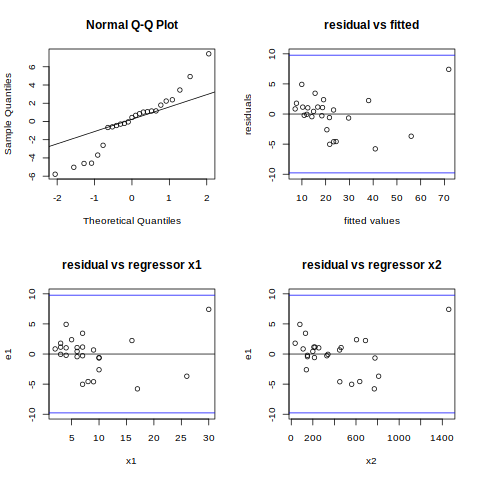

In [21]:
%%R

#[4a] Four plots for residuals e1

par(mfrow=c(2,2))
qqnorm(e1)   #normal probability plot
qqline(e1)
shapiro.test(e1)  #normality test (optional)

fitted=y-e1
plot(fitted,e1,xlab="fitted values", ylab="residuals",ylim=c(-10,10))
abline(h=0)
title("residual vs fitted")
abline(h=3*sqrt(MSE), col="blue")
abline(h=-3*sqrt(MSE), col="blue")

plot(x1,e1,ylim=c(-10,10))
abline(h=0)
title("residual vs regressor x1")
abline(h=3*sqrt(MSE), col="blue")
abline(h=-3*sqrt(MSE), col="blue")

plot(x2,e1,ylim=c(-10,10))
abline(h=0)
title("residual vs regressor x2")
abline(h=3*sqrt(MSE), col="blue")
abline(h=-3*sqrt(MSE), col="blue")

#### (4b) Plots for others

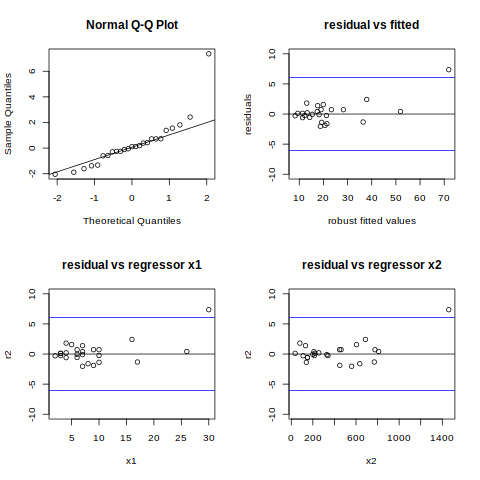

In [22]:
%%R

#[4b] The same four plots for robust residual r2. These can also be done
#     to other residuals. Try it yourself.

par(mfrow=c(2,2))
qqnorm(r2)   #normal probability plot
qqline(r2)
shapiro.test(r2)  #normality test (optional)

fitted1=y-r2
plot(fitted1,r2,xlab="robust fitted values", ylab="residuals",ylim=c(-10,10))
abline(h=0)
title("residual vs fitted")
abline(h=3*s, col="blue")
abline(h=-3*s, col="blue")

plot(x1,r2,ylim=c(-10,10))
abline(h=0)
title("residual vs regressor x1")
abline(h=3*s, col="blue")
abline(h=-3*s, col="blue")

plot(x2,r2,ylim=c(-10,10))
abline(h=0)
title("residual vs regressor x2")
abline(h=3*s, col="blue")
abline(h=-3*s, col="blue")

### Regression with cleaned up/adjusted data

In [25]:
%%R

### 5. Regression with cleaned up data (remove outlier and refit model)

#delete observation 9 (the outlier) from the data set
Xdata=cbind(x1,x2)
Xdata1=Xdata[-9,]
y1=y[-9]

fit2=lm(y1~Xdata1)  # LSE without the outlier
robfit2=lmrob(y1~Xdata1) # robust regression without the outlier

#compare regression results with and without outliers

print(summary(fit1)$coef)    #observe the substantial difference between the two LSE
print(summary(fit2)$coef)    #results without the outlier.
print(summary(robfit)$coef)  #robust regression automatically handles the outlier; so
print(summary(robfit2)$coef) #not much difference between the two robust fits.

              Estimate  Std. Error  t value     Pr(>|t|)
(Intercept) 2.34123115 1.096730168 2.134738 4.417012e-02
x1          1.61590721 0.170734918 9.464421 3.254932e-09
x2          0.01438483 0.003613086 3.981313 6.312469e-04
              Estimate  Std. Error   t value     Pr(>|t|)
(Intercept) 4.44723773 0.952468934  4.669168 1.313599e-04
Xdata1x1    1.49769128 0.130206525 11.502429 1.583565e-10
Xdata1x2    0.01032406 0.002853586  3.617924 1.613583e-03
              Estimate  Std. Error   t value     Pr(>|t|)
(Intercept) 4.47175049 0.697917228  6.407279 1.903697e-06
x1          1.47178908 0.140104967 10.504903 4.889974e-10
x2          0.01076903 0.004358622  2.470742 2.170797e-02
              Estimate  Std. Error  t value     Pr(>|t|)
(Intercept) 4.47053344 0.714745274 6.254723 3.332789e-06
Xdata1x1    1.46521357 0.146533111 9.999198 1.940147e-09
Xdata1x2    0.01091498 0.004793278 2.277144 3.335845e-02


-------------------

## Week 8, ct. 21-27 Q 4.5

Fit a multiple linear regression model 
$$
y = \beta_0 + \beta_1 x_1 + .. + \beta_7 x_7 + \epsilon
$$

Perform residual analysis and answer the following:

- (a) Construct a normal probability plot of the residuals. Does there seem to be any probe with the normality assumption?
- (b) Construct a plot of the residuals vs fitted values and comment on the plot.
- (c) Are there any outliers?


$$
\sim \sim \sim
$$

### (a) Construct normal probability plot of residuals. Check for issues with normality assumption

The normal probability plot (normal-QQ plot) uses robust (or studentized) residuals. We use robust as they are easier to plot (more reliable at detecting violation of normality assumption - studentized better for detecting outliers)

We first load the data (B4.prn)

In [1]:
%reload_ext rpy2.ipython

In [5]:
%%R

df = read.table(file="B4.prn", header=TRUE)
attach(df)
print(df)

R[write to console]: The following objects are masked from df (pos = 4):

    x1, x2, x3, x4, x5, x6, x7, x8, x9, y




      y     x1  x2     x3    x4  x5 x6 x7 x8 x9
1  29.5 5.0208 1.0 3.5310 1.500 2.0  7  4 62  0
2  27.9 4.5429 1.0 2.2750 1.175 1.0  6  3 40  0
3  25.9 4.5573 1.0 4.0500 1.232 1.0  6  3 54  0
4  29.9 5.0597 1.0 4.4550 1.121 1.0  6  3 42  0
5  29.9 3.8910 1.0 4.4550 0.988 1.0  6  3 56  0
6  30.9 5.8980 1.0 5.8500 1.240 1.0  7  3 51  1
7  28.9 5.6039 1.0 9.5200 1.501 0.0  6  3 32  0
8  35.9 5.8282 1.0 6.4350 1.225 2.0  6  3 32  0
9  31.5 5.3003 1.0 4.9883 1.552 1.0  6  3 30  0
10 31.0 6.2712 1.0 5.5200 0.975 1.0  5  2 30  0
11 30.9 5.9592 1.0 6.6660 1.121 2.0  6  3 32  0
12 30.0 5.0500 1.0 5.0000 1.020 0.0  5  2 46  1
13 36.9 8.2464 1.5 5.1500 1.664 2.0  8  4 50  0
14 41.9 6.6969 1.5 6.9020 1.488 1.5  7  3 22  1
15 40.5 7.7841 1.5 7.1020 1.376 1.0  6  3 17  0
16 43.9 9.0384 1.0 7.8000 1.500 1.5  7  3 23  0
17 37.5 5.9894 1.0 5.5200 1.256 2.0  6  3 40  1
18 37.9 7.5422 1.5 5.0000 1.690 1.0  6  3 22  0
19 44.5 8.7951 1.5 9.8900 1.820 2.0  8  4 50  1
20 37.9 6.0831 1.5 6.7265 1.652 1.0  6  

We can now calculate the robust residuals r2

In [7]:
%%R

library(robustbase)
robfit = lmrob(y ~ x1+x2+x3+x4+x5+x6+x7)
r2 =robfit$residuals
s = robfit$scale
r2 = r2/s

# verify: daa pts, residuals and diagH
print(r2)

          1           2           3           4           5           6 
-0.01593513  0.01108443 -1.07514898  0.22944376  1.17238844 -0.40252169 
          7           8           9          10          11 

         12 
-0.57475941  0.83875446  0.27091724 -1.22723657 -1.21406768  0.19725151 
         13          14          15          16          17          18 
-1.56316513  0.92397017  0.29327117  1.69064594  1.45734604 -0.59446114 
         19          20          21          22          23          24 
 0.39959253  0.26012594 -1.42671658 -0.99650024  1.45433704 -0.02459034 


We use r2 to create a QQ plot

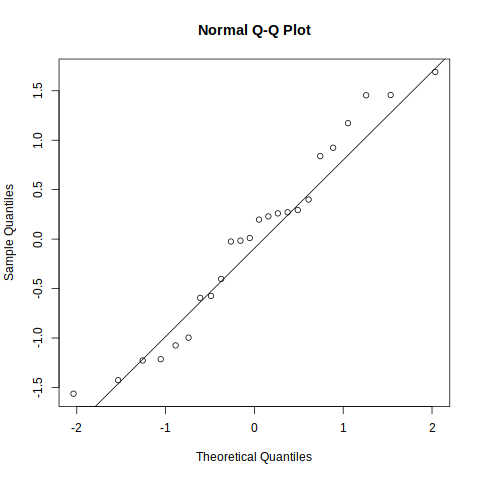

In [8]:
%%R
qqnorm(r2)
qqline(r2)


Compare with the following:

![Tails](qqplot_types.png)

Clearly the data is heavy-tailed, indicating violation of normality assumption.

### (b) Construct a plot of the residuals vs fitted values and comment on the plot.

We plot residuals vs fitted:

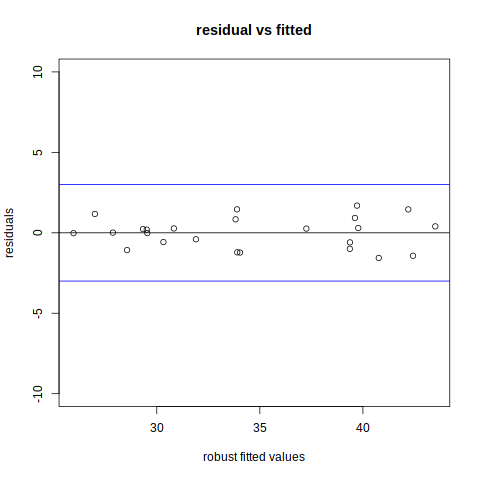

In [11]:
%%R

fitted = robfit$fitted #y-r2
plot(fitted,
    r2,
    xlab="robust fitted values",
    ylab="residuals",
    ylim=c(-10,10))
title("residual vs fitted")
abline(h=0)
abline(h=3, col="blue") # Removed: h=3*s: Already standardized (?ai)
abline(h=-3, col="blue")

### (c) Outliers?

There's one potential outlier: The fitted value $\hat y \approx 70$

-----------

## Wk.8, Oct.21-27: Q 4.6

Consider the simple linear regression model ﬁt to the oxygen purity data in Problem 2.7.
- (a) Construct a normal probability plot of the residuals. Does there seem to be any problem with the normality assumption?
- (b) Construct and interpret a plot of the residuals versus the predicted response

### (a) QQ plot to assess normality assumption 

We first load the data

       y   x1
1  86.91 1.02
2  89.85 1.11
3  90.28 1.43
4  86.34 1.11
5  92.58 1.01
6  87.33 0.95
7  86.29 1.11
8  91.86 0.87
9  95.61 1.43
10 89.86 1.02
11 96.73 1.46
12 99.42 1.55
13 98.06 1.55
14 96.07 1.55
15 93.65 1.40
16 87.31 1.15
17 95.00 1.01
18 96.85 0.99
19 85.20 0.95
20 90.56 0.98


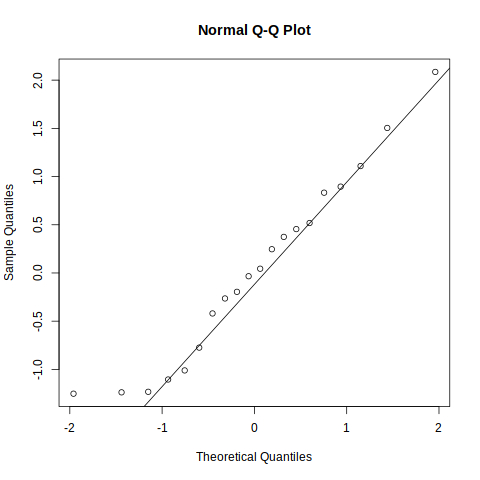

In [2]:
%%R

rm(list = ls())


# Load data
df = read.table(file="2-7.prn", header=TRUE)
attach(df)
print(df)

# Calculate robust residuals
library(robustbase)
robfit=lmrob(y~x1)
r2=robfit$residuals
s = robfit$scale
r2=r2/s # normalize

# Normal-QQ plot
fitted=robfit$fitted # y-r2
qqnorm(r2)
qqline(r2)

We can see that the plot has a light left tail or perhaps a skew, violating the normality assumption.

### (b) Residuals vs predicted response (fitted)

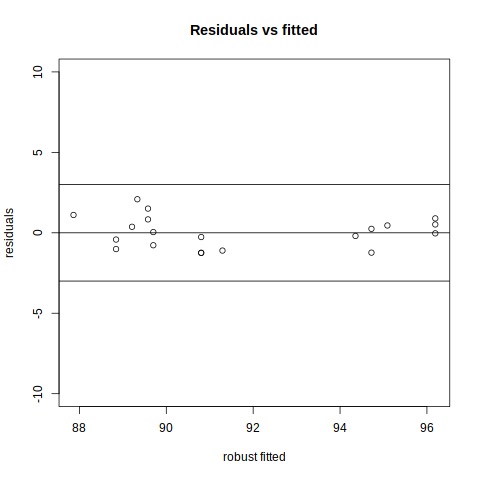

In [3]:
%%R

plot(fitted,
    r2,
    xlab="robust fitted",
    ylab="residuals",
    ylim=c(-10,10))
title("Residuals vs fitted")
abline(h=0)
abline(h=3)
abline(h=-3)

There are no outliers, but curve suggests a nonlinear (quadratic) model would suit better

----------

## Wk.8, Oct.21-27: R code 'Example 4.8 R script"

Shows how to use R to perform lack of fit related analysis. Run the code, understand every line of code and the output.

[1] 250.1338
[1] 15.56303
[1] 234.5708
F-stat for LoF:
[1] 13.18827
The p-value for the lack of fit test is: 0.001388715 

Summary: Quadratic model
-----------------


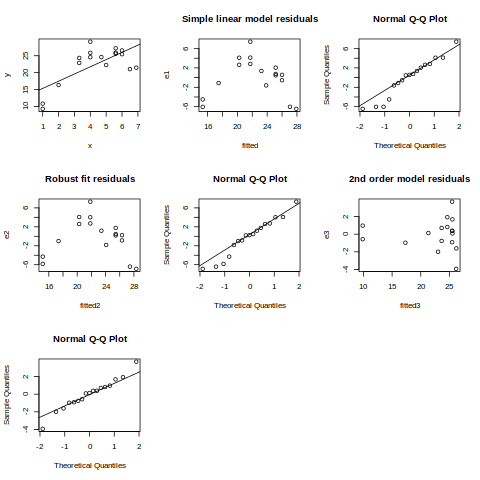

In [129]:
%%R 

# Example 4.8: Testing for lack of fit
#
# This R code illustrates how to test for lack of fit in a simple linear model. Most
# commercial stats packages have build-in functions/options which allow users to test
# for lack of fit easily.

### [1] Input Data
#
x=c(1,1,2,3.3,3.3,4,4,4,4.7,5,5.6,5.6,5.6,6,6,6.5,6.9)
y=c(10.84,9.3,16.35,22.88,24.35,24.56,25.86,29.16,24.59,22.25,25.9,27.2,25.61,25.45,26.56,21.03,21.46)

par(mfrow=c(3,3))
plot(x,y)

# [2] Fit a simple linear model 

h0=lm(y~x) #beta_1 = 0; F-test
abline(h0)
e1=h0$residuals
fitted=y-e1 # fitted2=h0$fitted

plot(fitted,e1)  
title("Simple linear model residuals")
qqnorm(e1) # QQ plot - normality assumption
qqline(e1)  # Clearly nonlinear - these plots suggest the model is inadequate
summary.lm(h0)

# [3] Fit a simple linear model using robust method to illustrate
#     the lack of fit problem may NOT be because of outliers

library(robustbase)  # loading the robustbase package
h0rob=lmrob(y~x)
e2=h0rob$residuals
fitted2=y-e2
plot(fitted2,e2)
title("Robust fit residuals")
summary.lm(h0rob)


qqnorm(e2)
qqline(e2)  # the fit did not improve, suggesting outliers are not the problem


# [4] test lack of fit: Group means

n=length(y)
ybar=y # will hold group means
index=c(1:n)
m=1

# group observations by unique x values
for (i in 1:n) { # for each x...
     m1=index[x==x[i]] # find all indices where x equals current xi
     ybar[m1]=mean(y[m1]) # calculate mean of y values for those indices, replace corresponding position in ybar w the mean
     if ((i>1) && (x[i] != x[i-1])) m=m+1 # increment counter m when moving to new x value
               }

SSRes=sum(e1^2) # Sum of squares; residuals
SSPe=sum((y-ybar)^2) # Pure error sum of squares: Deviation from group means
SSlof=SSRes-SSPe # Sum of squares Lack of Fit
print(SSRes)
print(SSPe)
print(SSlof)

# Test: F statistic for lack of fit
    # MSlof/MSpe
    # DF of SSlof: m-2 (#unique x's - #regressors)
    # DF of SSpe: n-m (#obs - #unique)
F0=SSlof/(m-2)/(SSPe/(n-m))
writeLines("F-stat for LoF:")
print(F0)
pvalue=1-pf(F0,m-2,n-m)
cat("The p-value for the lack of fit test is:", pvalue, "\n")  
# pv=0.001388, strong evidence against H0: Large F-statistic, Small p-value
# Note that a large F-statistic in this case comes from a large SSlof; we are testing
    # whether SSlof is small i.e. the error of the model is close to the pre error

# # [5] Fit a second order model with the quadratic term

x2=x^2
h0quad=lm(y~x+x2)
# abline(hquad)
e3=h0quad$residuals
fitted3=y-e3 # h0quad$fitted
writeLines("\nSummary: Quadratic model")
writeLines("-----------------")
summary.lm(h0quad)

plot(fitted3,e3)  
abline(h0quad)

title("2nd order model residuals")
qqnorm(e3)  # these plots suggest the 2nd order model fits better (two mild outliers?).
qqline(e3)  # the R^2 and Radj^2 values are also much larger than before. 

# # The lack of fit is significant (pvalue < 0.01) 
#   and 2nd order model more appropriate.


----------

- **F-test: $\beta_1 = ... = \beta_n = 0$**
- **t-test:** $\beta_i = 0$

**Robust fit working principle**: See if normality assumption is due to outliers or not
- Assigns different weights to observations based on their residuals
- Reduces the influence of extreme values rather than removing them
- Maintains all data points in the analysis


----------

In regression analysis, there are two common types of null hypotheses (H₀):

## Individual Tests
For testing a single coefficient:
- H₀: βᵢ = 0 (testing if one specific predictor has no effect)
- This tests whether there's a relationship between one specific independent variable and the dependent variable

## Joint Tests (Overall Model)
For testing all coefficients simultaneously:
- H₀: β₁ = β₂ = ... = βₙ = 0
- This tests whether none of the predictor variables have any relationship with the dependent variable
- Used in the overall F-test for model significance

## Key Distinction
The choice between individual or joint tests depends on your goal:
- Individual tests help identify which specific variables are significant
- Joint tests determine if the entire model has any predictive power

The most common approach is to first conduct the joint test (F-test) to validate the overall model, then examine individual coefficient tests (t-tests) to identify significant predictors[5][6].